In [1]:
#analyze_dataset.py
import os
from collections import Counter
import matplotlib.pyplot as plt

# Fixed: Added class 3 (was missing!)
CLASS_NAMES = {
    0: "Longitudinal crack",
    1: "Transverse crack",
    2: "Alligator crack",
    3: "other damage",        # D40 in RDD2022
    4: "Pothole"    # D44 in RDD2022
}

NUM_CLASSES = 5  # Background + 4 damage types for segmentation

In [2]:
def analyze_labels(labels_dir):
    counter = Counter()
    empty_files = 0
    empty_files_names = []

    for file in os.listdir(labels_dir):
        if not file.endswith(".txt"):
            continue

        with open(os.path.join(labels_dir, file), "r") as f:
            lines = f.readlines()
            if len(lines) == 0:
                empty_files += 1
                empty_files_names.append(file)
                continue

            for line in lines:
                class_id = int(line.split()[0])
                counter[class_id] += 1

    return counter, empty_files, empty_files_names

In [3]:
def plot_distribution(counter, save_path):
    classes = list(counter.keys())
    counts = list(counter.values())
    names = [CLASS_NAMES.get(c, str(c)) for c in classes]

    plt.figure(figsize=(8, 5))
    plt.bar(names, counts)
    plt.title("RDD2022 - Distribution des classes")
    plt.ylabel("Nombre d'instances")
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()


====== DATASET STATISTICS ======
Distribution des classes : Counter({2: 3356, 4: 3252, 3: 3167, 1: 3030, 0: 3004})
Images sans dommages : 350
Noms des fichiers sans dommages : ['China_Drone_001391.txt', 'Czech_000057.txt', 'Czech_000137.txt', 'Czech_000145.txt', 'Czech_000259.txt']


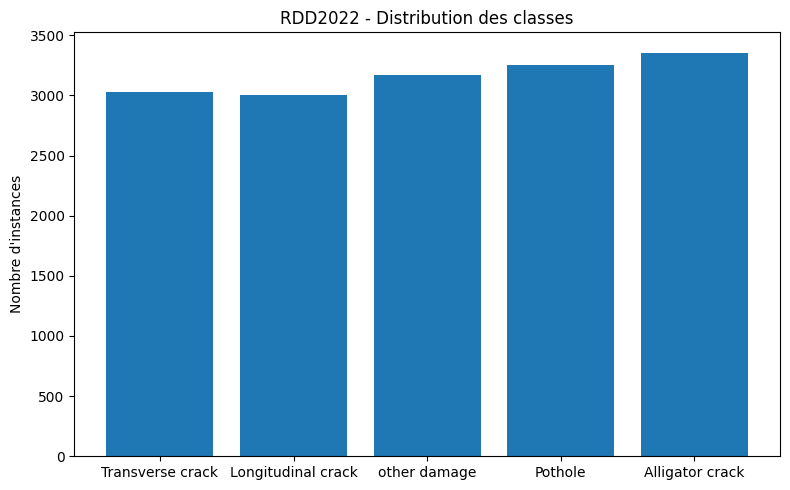

In [4]:
# labels_dir = "../../dataset/raw/train/labels"
labels_dir = "../dataset/reduced/train/labels"
save_fig = "../outputs/figures/class_distribution.png"
os.makedirs("../outputs/figures", exist_ok=True)

counter, empty, empty_files_names = analyze_labels(labels_dir)

print("====== DATASET STATISTICS ======")
print("Distribution des classes :", counter)
print("Images sans dommages :", empty)
print("Noms des fichiers sans dommages :", empty_files_names[:5])  # Affiche les 5 premiers noms de fichiers

plot_distribution(counter, save_fig)

In [5]:
N = sum(counter.values())
C = len(counter)

class_weights = {
    c: N / (C * n)
    for c, n in counter.items()
}

print(class_weights)

{1: 1.0434983498349835, 0: 1.0525299600532623, 3: 0.9983580675718345, 4: 0.9722632226322263, 2: 0.9421334922526817}
